In [87]:
# Imports
import pandas
import matplotlib.pyplot as plt
from scipy.signal import butter, lfilter, filtfilt
import numpy as np



In [88]:
# Load the txt files into a pandas dataframe
thorax1 = pandas.read_csv('ECGdata/thorax1.txt')
thorax2 = pandas.read_csv('ECGdata/thorax2.txt')
abdomen1 = pandas.read_csv('ECGdata/abdomen1.txt')
abdomen2 = pandas.read_csv('ECGdata/abdomen2.txt')
abdomen3 = pandas.read_csv('ECGdata/abdomen3.txt')

abdomen3.shape


(19999, 1)

In [89]:
# Normalize the data to unit variance and zero mean
thorax1 = (thorax1 - thorax1.mean()) / thorax1.std()
thorax2 = (thorax2 - thorax2.mean()) / thorax2.std()
abdomen1 = (abdomen1 - abdomen1.mean()) / abdomen1.std()
abdomen2 = (abdomen2 - abdomen2.mean()) / abdomen2.std()
abdomen3 = (abdomen3 - abdomen3.mean()) / abdomen3.std()

abdomen3.shape


(19999, 1)

In [90]:
def highpass_filter(data, cutoff, fs, order=4):
    pad_length = 15

    # Ensure `data` is 1D before padding
    if len(data.shape) > 1:
        data = data.values.flatten()  # Flatten to 1D if necessary

    # Apply padding
    padded_signal = np.pad(data, pad_length)

    # Design high-pass filter
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype='high', analog=False)

    # Filter the signal
    filtered_sig = filtfilt(b, a, padded_signal)

    # Return the signal with padding removed
    return filtered_sig[pad_length:-pad_length]
def lowpass_filter(data, cutoff, fs, order=4):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype='low', output='ba')
    return lfilter(b, a, data)

In [91]:
def plot_signal(signal, name, time_steps=2000):
    # plt.clf()
    plt.figure(figsize=(20,5))
    plt.plot(signal[:time_steps], label=name)
    plt.title(name)
    plt.legend()
    plt.show()
    # plt.clf()

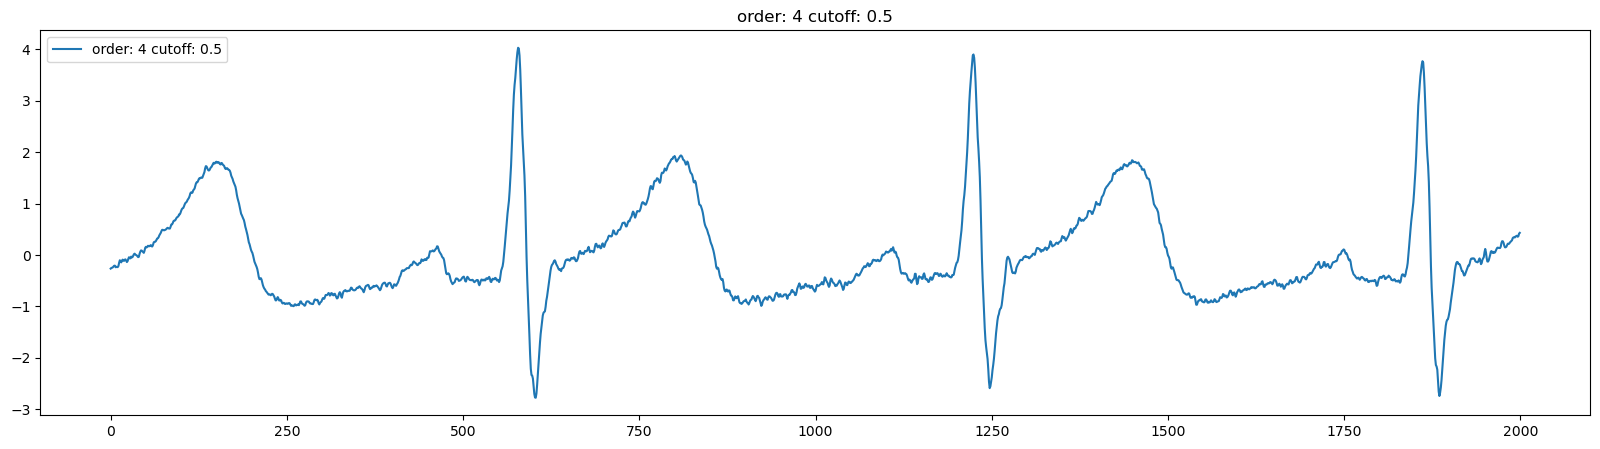

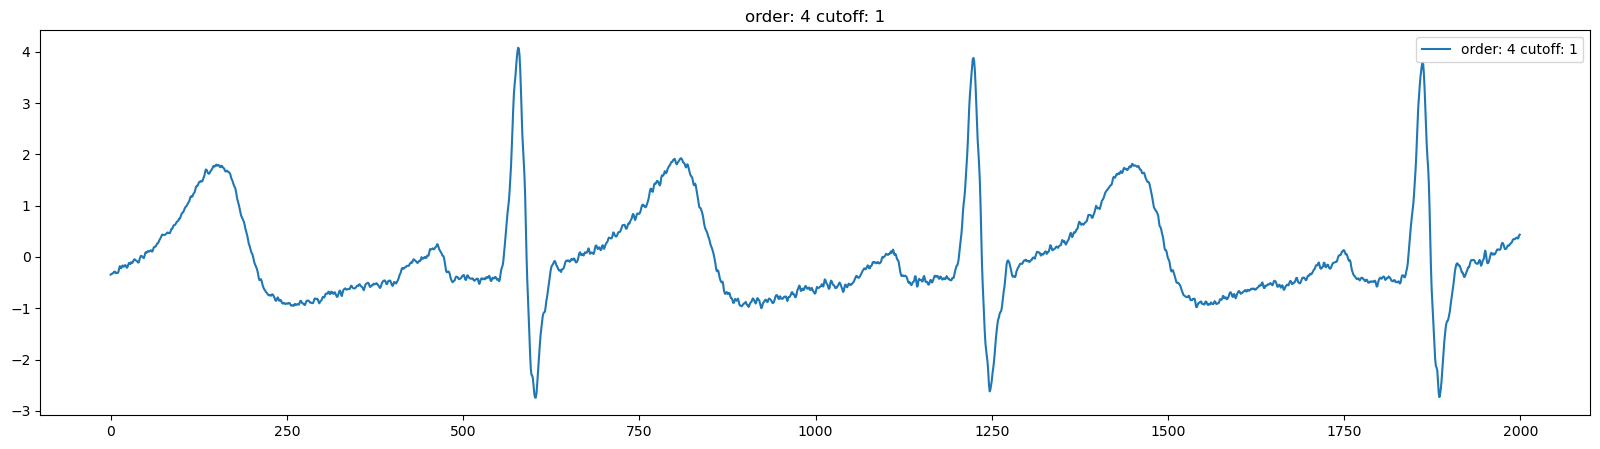

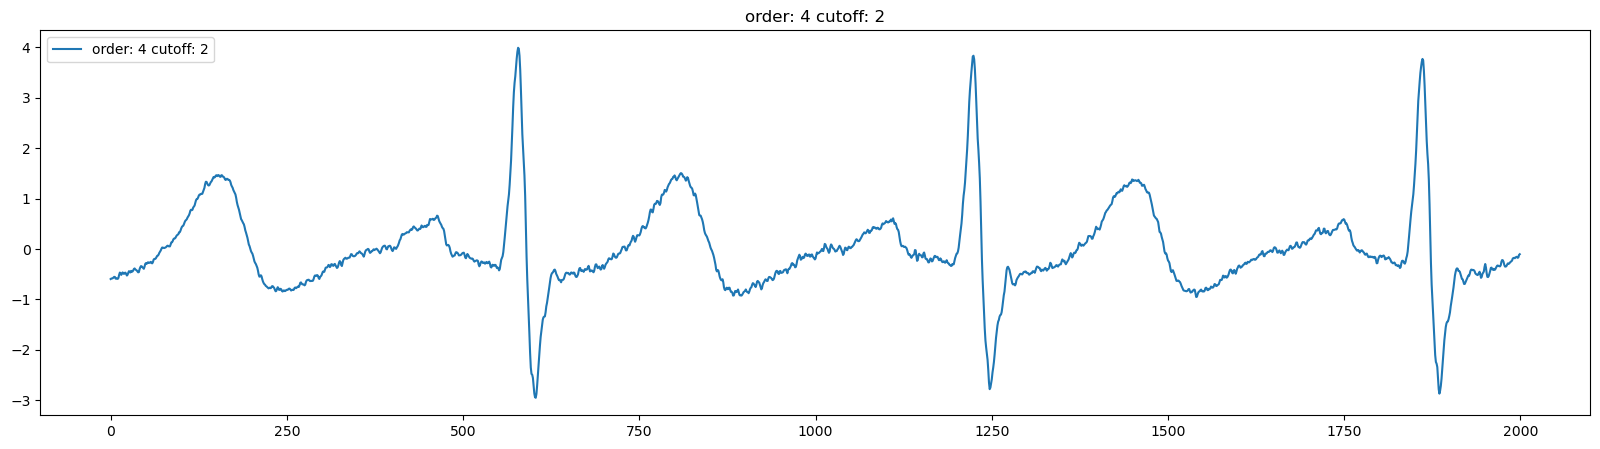

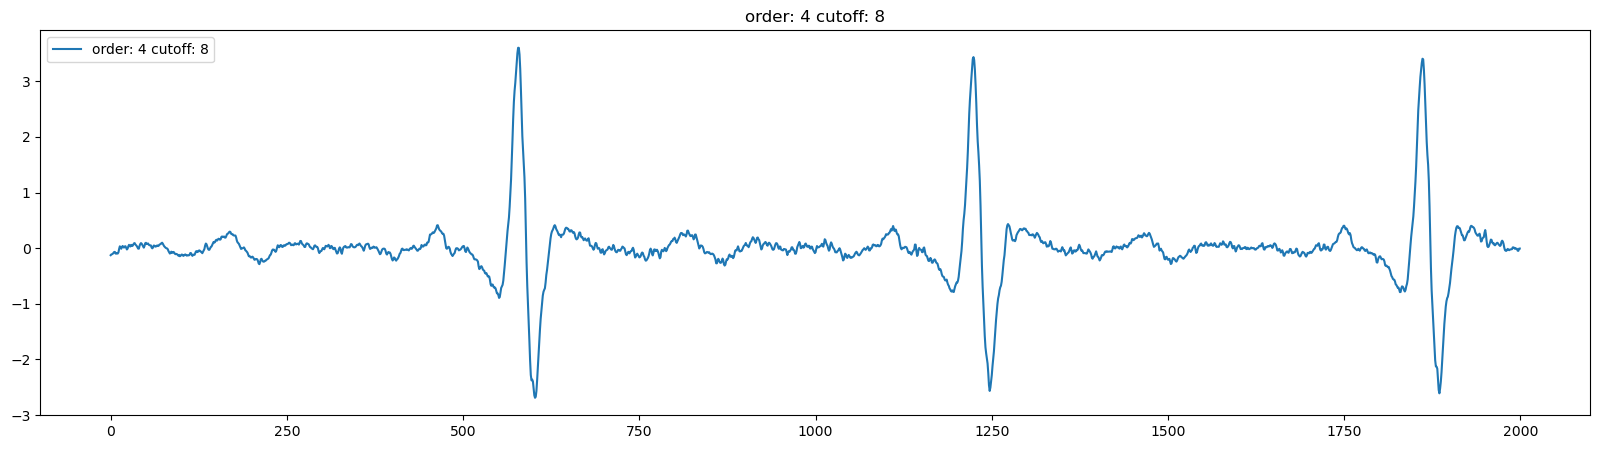

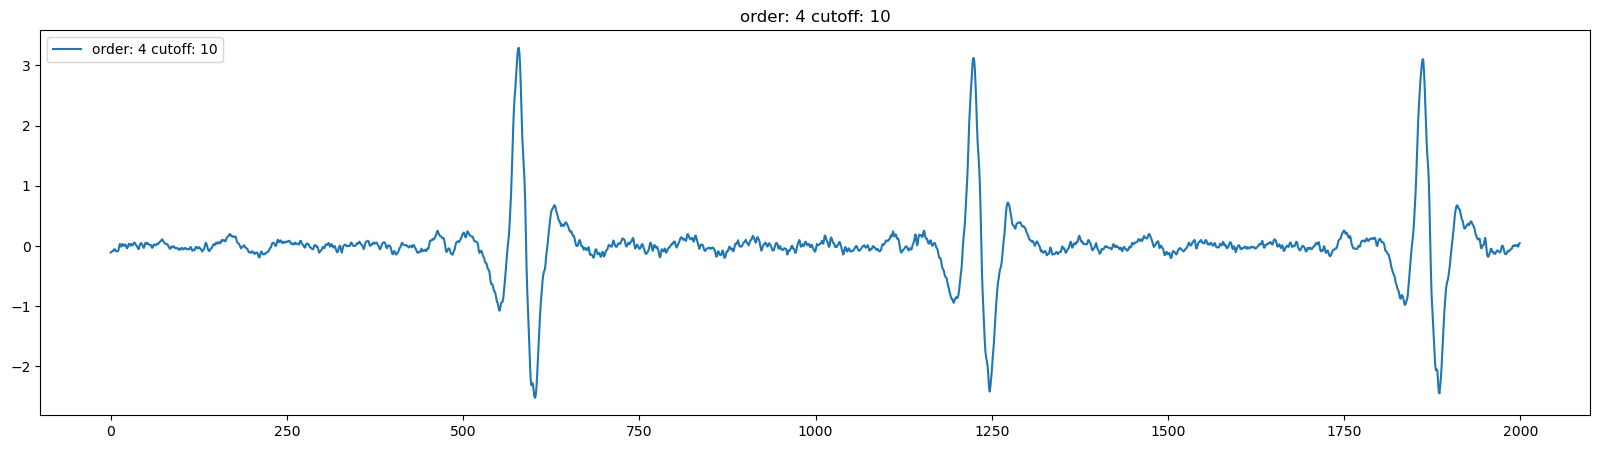

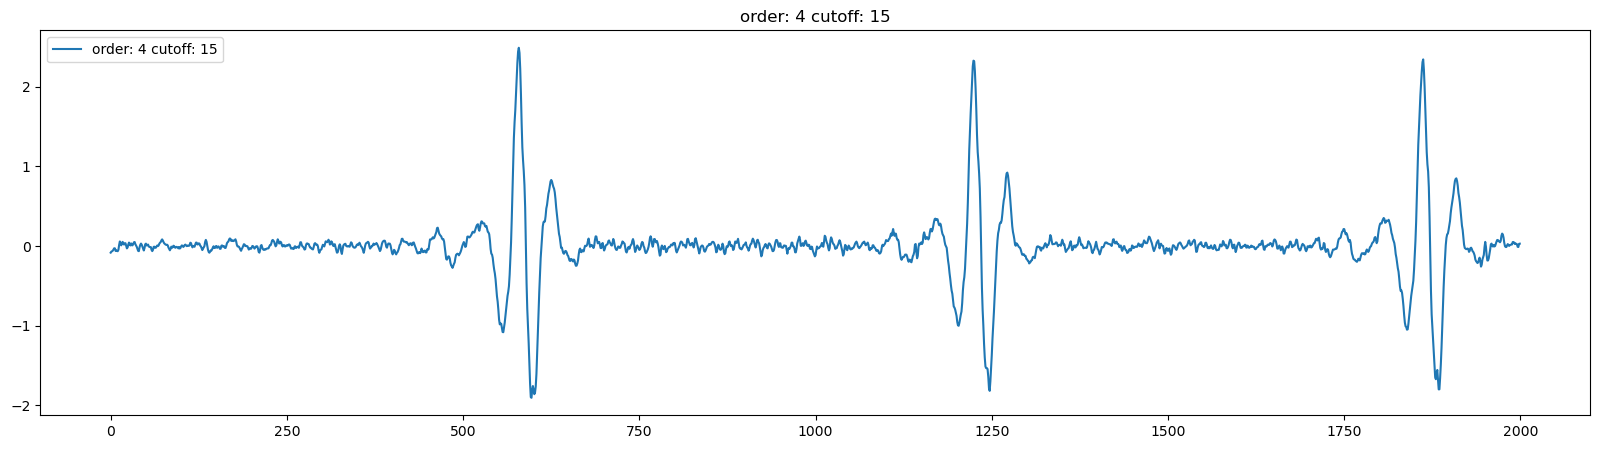

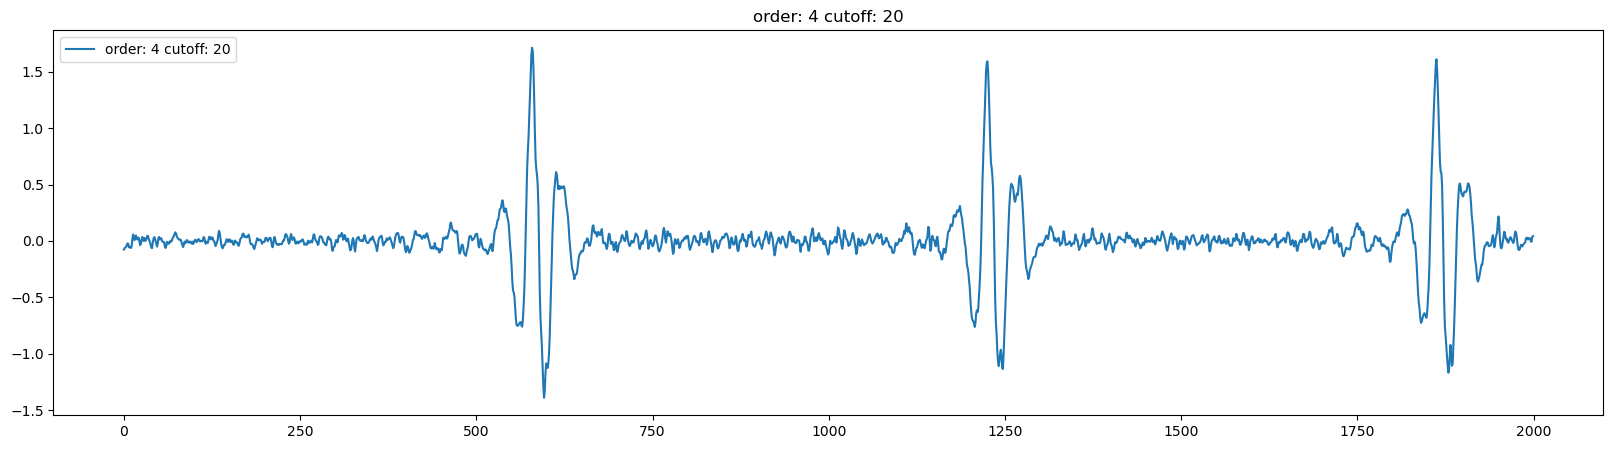

In [100]:
# High pass filter to remove baseline wander
cutoff_baseline = 0.5
fs = 1000


# thorax1 = highpass_filter(thorax1, cutoff_baseline, fs)
# thorax2 = highpass_filter(thorax2, cutoff_baseline, fs)
# abdomen1 = highpass_filter(abdomen1, cutoff_baseline, fs)
# abdomen2 = highpass_filter(abdomen2, cutoff_baseline, fs)
# abdomen3_filtered = highpass_filter(abdomen3, cutoff_baseline, fs)

# TEMPORARY
cutoff_baseline = [0.5, 1, 2, 8, 10, 15, 20]
for f in cutoff_baseline:
    filtered_signal = highpass_filter(thorax1, f, fs, order=4)
    plot_signal(filtered_signal, f"order: {4} cutoff: {f}")
    # plt.clf()


In [93]:
# # Plot the data
# plt.figure(figsize=(20,5))
# plt.plot(thorax1[:2000], label='Thorax 1')
# plt.title("Thorax 1")
# plt.show()

# plt.figure(figsize=(20,5))
# plt.plot(thorax2[:2000], label='Thorax 2')
# plt.title("Thorax 2")
# plt.show()

# plt.figure(figsize=(20,5))
# plt.plot(abdomen1[:2000], label='Abdomen 1')
# plt.title("Abdomen 1")
# plt.show()

# plt.figure(figsize=(20,5))
# plt.plot(abdomen2[:2000], label='Abdomen 2')
# plt.title("Abdomen 2")
# plt.show()

# plt.figure(figsize=(20,5))
# plt.plot(abdomen3[:2000], label='Abdomen 3')
# plt.title("Abdomen 3")
# plt.show()

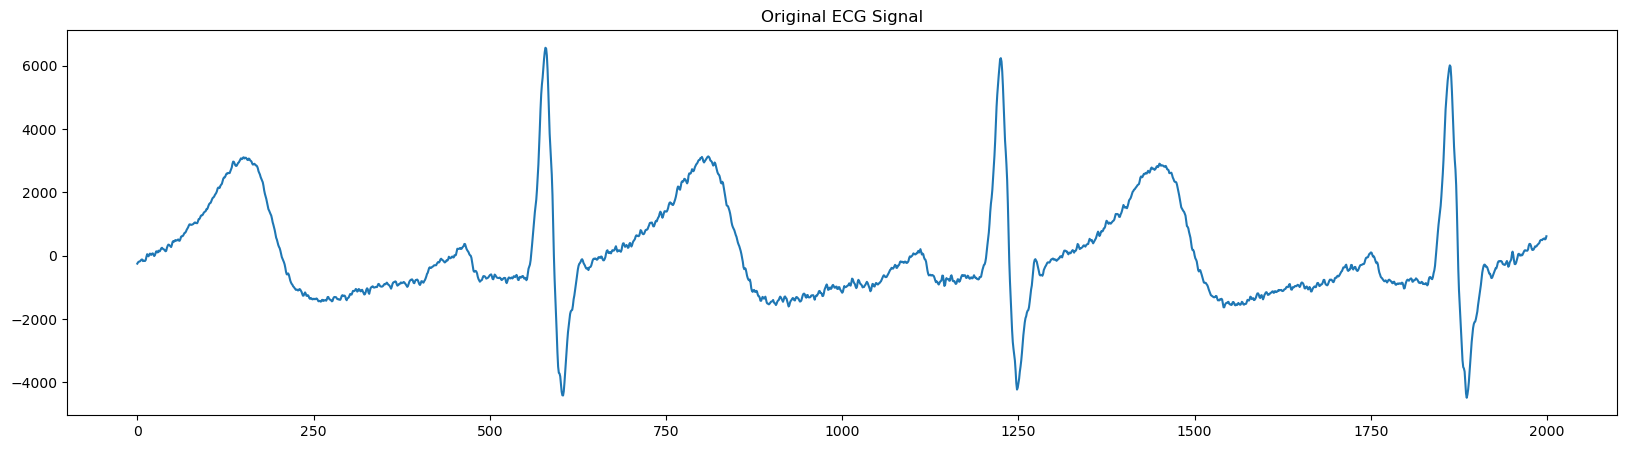

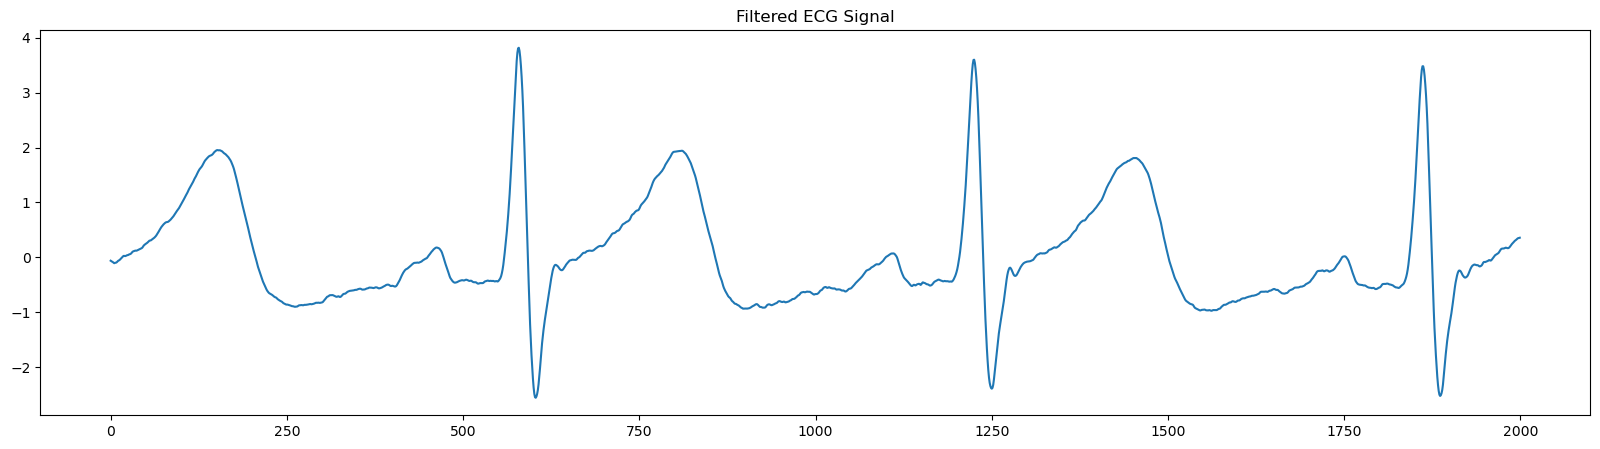

In [106]:
# Load ECG signal into a NumPy array
ecg_signal = np.loadtxt('ECGdata/thorax1.txt')
# Plot the ECG signal
plt.figure(figsize=(20,5))
plt.plot(ecg_signal[:2000])
plt.title('Original ECG Signal')
plt.show()
# Create a moving average filter with window size 10
window_size = 10
filter_weights = np.ones(window_size) / window_size
# Apply the filter to the ECG signal
filtered_signal = np.convolve(ecg_signal, filter_weights, mode='same')
# Plot the filtered signal
filtered_signal=filtered_signal - np.mean(filtered_signal)
filtered_signal=filtered_signal / np.std(filtered_signal)
plt.figure(figsize=(20,5))
plt.plot(filtered_signal[:2000])
plt.title('Filtered ECG Signal')
plt.show()